# Introduction

We will attempt to predict the outcome of matches in one of the upcoming gameweeks of the 2022-23 English Premier League (EPL) season. 
We informed our choices at each stage of this project based on existing research relating to football score predictions. Data analysis was paired with our own contextual understanding of the problem setting to conduct data transformation for creating an enhanced dataset. To determine the optimal model for our dataset, a variety of multi-class classification models were tested, along with appropriate model selection strategies.

Key points about EPL

*   There are 20 teams and 380 matches each season 
*   Each season typically runs from August to May
*   Each team playes 38 matches -> plays all the other 19 teams both home and away



# Data Import

**Library imports**

In [155]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import collections
import queue
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import typing
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, \
    precision_score

warnings.filterwarnings("ignore")
%matplotlib inline

In [156]:
X = pd.read_csv('epl-training.csv')

In [157]:
X.shape

(8487, 22)

An empty row was found in the dataset and is dropped:

In [158]:
X.isna().sum()

Date        1
HomeTeam    1
AwayTeam    1
FTHG        1
FTAG        1
FTR         1
HTHG        1
HTAG        1
HTR         1
Referee     1
HS          1
AS          1
HST         1
AST         1
HC          1
AC          1
HF          1
AF          1
HY          1
AY          1
HR          1
AR          1
dtype: int64

In [159]:
X.dropna(inplace=True)
X = X.reset_index(drop=True)

Imported data set:

In [160]:
X.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,19/08/00,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,19/08/00,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,19/08/00,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,19/08/00,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,19/08/00,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


# Data Transformation & Exploration

**Exploring the categorical features**

---



In [161]:
print("No. teams: ", X['HomeTeam'].nunique())

No. teams:  45


We expected the no. of teams to be higher than 20 due to the promotion-relocation rule of EPL

In [162]:
X['Referee'] = X['Referee'].replace({'Alan Wiley': 'A G Wiley',
                                     'A.G.Wiley': 'A G Wiley',
                                     'Graham Barber': 'G Barber',
                                     'G. P. Barber': 'G Barber',
                                     'G. P. Barber ': 'G Barber',
                                     'Barber, G. P.': 'G Barber',
                                     'Barry Knight': 'B Knight',
                                     'B. Knight ': 'B Knight',
                                     'B. Knight': 'B Knight',
                                     'Knight, B.': 'B Knight',
                                     "Andy D'Urso": "A D'Urso",
                                     "Andy D'Urso ": "A D'Urso",
                                     "A. P. D'Urso ": "A D'Urso",
                                     "A. P. D'Urso": "A D'Urso",
                                     "D'Urso, A. P.": "A D'Urso",
                                     'Dermot Gallagher': "D Gallagher",
                                     'D. J. Gallagher': "D Gallagher",
                                     'Gallagher, D. J.': "D Gallagher",
                                     'D Gallagh': 'D Gallagher',
                                     'D Gallaghe': 'D Gallagher',
                                     'Mike Riley': 'M Riley',
                                     'M. A. Riley ': 'M Riley',
                                     'M. A. Riley': 'M Riley',
                                     'Riley, M. A.': 'M Riley',
                                     'Paul Durkin': 'P Durkin',
                                     'P. A. Durkin': 'P Durkin',
                                     'P. A. Durkin ': 'P Durkin',
                                     'P.A. Durkin': 'P Durkin',
                                     'Durkin, P. A.': 'P Durkin',
                                     'Durkin, P.': 'P Durkin',
                                     'Steve Dunn': 'S Dunn',
                                     'S. W. Dunn ': 'S Dunn',
                                     'S. W. Dunn': 'S Dunn',
                                     'Dunn, S. W.': 'S Dunn',
                                     'Graham Poll': 'G Poll',
                                     'G. Poll': 'G Poll',
                                     'G. Poll ': 'G Poll',
                                     'Poll, G.': 'G Poll',
                                     'Mark Halsey': 'M Halsey',
                                     'Mark Halsey ': 'M Halsey',
                                     'M. R. Halsey': 'M Halsey',
                                     'Halsey, M. R.': 'M Halsey',
                                     'Jeff Winter': 'J Winter',
                                     'J. T. Winter': 'J Winter',
                                     'J. T. Winter ': 'J Winter',
                                     'J.T. Winter': 'J Winter',
                                     'Winter, J. T.': 'J Winter',
                                     'Peter Jones': 'P Jones',
                                     'P. Jones ': 'P Jones',
                                     'P. Jones': 'P Jones',
                                     'Jones, P.': 'P Jones',
                                     'Rob Styles': 'R Styles',
                                     'R. Styles': 'R Styles',
                                     'Styles, R.': 'R Styles',
                                     'Styles, R': 'R Styles',
                                     'Steve Bennett': 'S Bennett',
                                     'Steve Bennett ': 'S Bennett',
                                     'S. G. Bennett': 'S Bennett',
                                     'Bennett, S. G.': 'S Bennett',
                                     'St Bennett': 'S Bennett',
                                     'Neale Barry': 'N Barry',
                                     'N. S. Barry': 'N Barry',
                                     'Barry, N. S.': 'N Barry',
                                     ' N Barry': 'N Barry',
                                     'Mike Dean': 'M Dean',
                                     'M. L Dean': 'M Dean',
                                     'M. L. Dean': 'M Dean',
                                     'Dean, M. L': 'M Dean',
                                     'Matt Messias': 'M Messias',
                                     'M. D. Messias': 'M Messias',
                                     'Messias, M. D.': 'M Messias',
                                     'Clive Wilkes': 'C Wilkes',
                                     'C. R. Wilkes ': 'C Wilkes',
                                     'C. R. Wilkes': 'C Wilkes',
                                     'Wilkes, C. R.': 'C Wilkes',
                                     'David Ellaray': 'D Elleray',
                                     'D. R. Elleray ': 'D Elleray',
                                     'Elleray, D. R.': 'D Elleray',
                                     'D. Pugh': 'D Pugh',
                                     'Pugh, D.': 'D Pugh',
                                     'E. K. Wolstenholme ': 'E Wolstenholme',
                                     'E. K. Wolstenholme': 'E Wolstenholme',
                                     'Wolstenholme, E. K.': 'E Wolstenholme',
                                     'C.J.Foy': 'C Foy'})

In [163]:
print("No. referees: ", X['Referee'].nunique())

No. referees:  96


In [164]:
X['Referee'].unique()

array(['Rob Harris', 'G Barber', 'B Knight', "A D'Urso", 'D Gallagher',
       'M Riley', 'P Durkin', 'S Dunn', 'A G Wiley', 'Steve Lodge',
       'G Poll', 'M Halsey', 'J Winter', 'P Jones', 'Andy Hall',
       'D Elleray', 'F Taylor', 'R Styles', 'S Bennett', 'Ian Harris',
       'Paul Taylor', 'N Barry', 'M Dean', 'Roy Burton', 'M Messias',
       'C Wilkes', 'E Wolstenholme', 'A. G. Wiley ', 'U. D. Rennie',
       'A. G. Wiley', 'D Pugh', 'A.G. Wiley', 'D. R. Elleray', 'P. Dowd',
       'C. J. Foy', 'Wiley, A. G.', 'Rennie, U. D.', 'Foy, C. J.',
       'Dowd, P.', 'Yates, N', 'A Wiley', 'U Rennie', 'C Foy', 'P Dowd',
       'R Martin', 'H Webb', 'P Walton', 'M Clattenburg', 'M Atkinson',
       'P Crossley', 'A Marriner', '†U Rennie', '†C Foy', '†A Wiley',
       '†D Gallagher', "†A D'Urso", '†H Webb', '†M Atkinson', '†N Barry',
       '†S Dunn', 'R Beeby', 'I Williamson', 'L Mason', 'K Stroud',
       'S Tanner', 'L Probert', 'S Attwell', 'M Jones', 'K Friend',
       'Mn Atkinson

In [165]:
X['Date'] = pd.to_datetime(X['Date'], dayfirst=True)

**Exploring the numerical features**

---

In [166]:
X.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000
mean,1.523922,1.154961,0.683125,0.507424,13.516498,10.666863,6.090502,4.749941,6.074358,4.778341,11.349517,11.831605,1.420929,1.745934,0.062456,0.088381
std,1.304660,1.142897,0.834362,0.723788,5.270113,4.598752,3.317540,2.783006,3.094963,2.738194,3.777291,3.955920,1.189447,1.265574,0.252949,0.295660
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,31.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


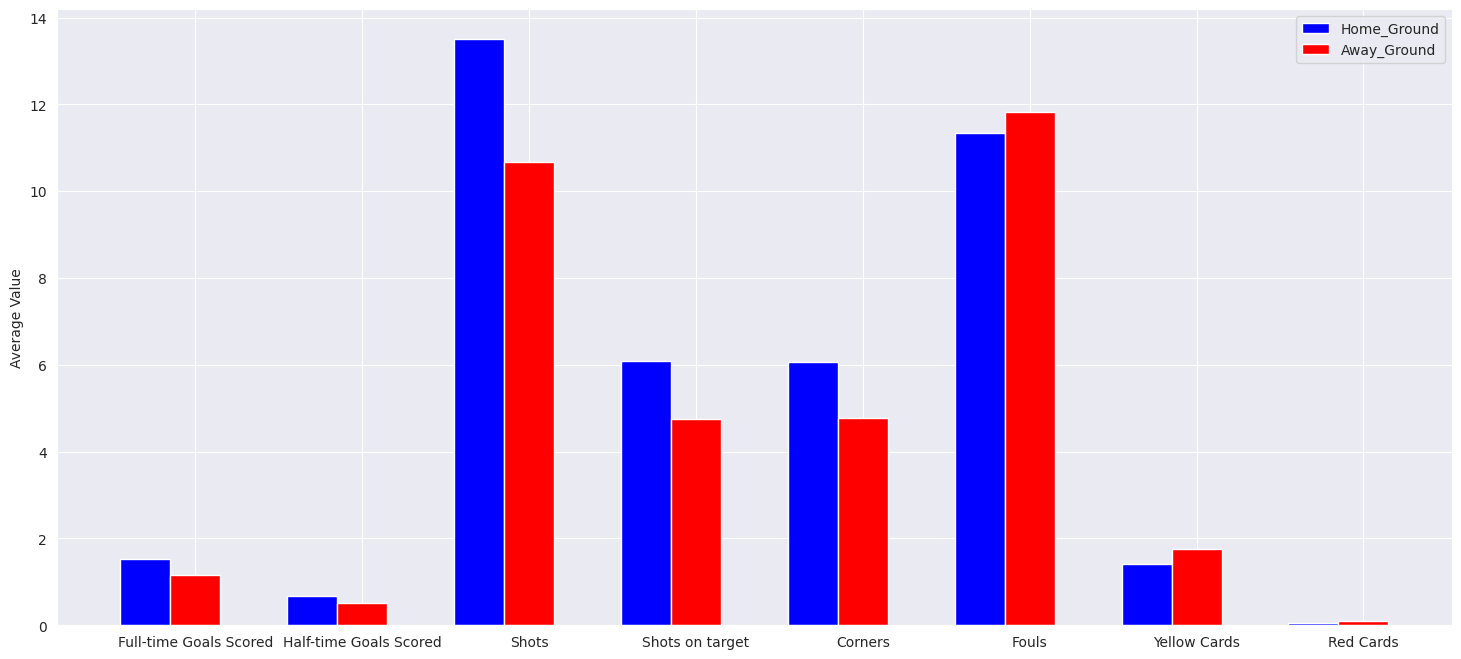

In [167]:
def plot_average_values():
    #Plot the average values for the numerical features for both home and away
    data_describe = X.describe()
    column_names = ['Full-time Goals Scored', 'Half-time Goals Scored', 'Shots', 'Shots on target', 'Corners', 'Fouls',
                    'Yellow Cards', 'Red Cards']
    plt.figure(figsize=(18, 8))

    bars1 = np.array(data_describe[1:2][(['FTHG', 'HTHG', 'HS', 'HST', 'HC', 'HF', 'HY', 'HR'])]).flatten()
    pos1 = np.arange(len(bars1.flatten()))
    plt.bar(pos1, bars1, width=0.3, color='blue', capsize=7, label='Home_Ground')

    bars2 = np.array(data_describe[1:2][(['FTAG', 'HTAG', 'AS', 'AST', 'AC', 'AF', 'AY', 'AR'])]).flatten()
    pos2 = [x + 0.3 for x in pos1]
    plt.bar(pos2, bars2, width=0.3, color='red', capsize=7, label='Away_Ground')

    plt.xticks([r + 0.3 for r in range(len(bars1))], column_names)
    plt.ylabel('Average Value')
    plt.legend()
    plt.show()


plot_average_values()

The stats registered for the home team were more favourable in comparison with the away team. This informed us to quantify the differences in performance when engineering new features.

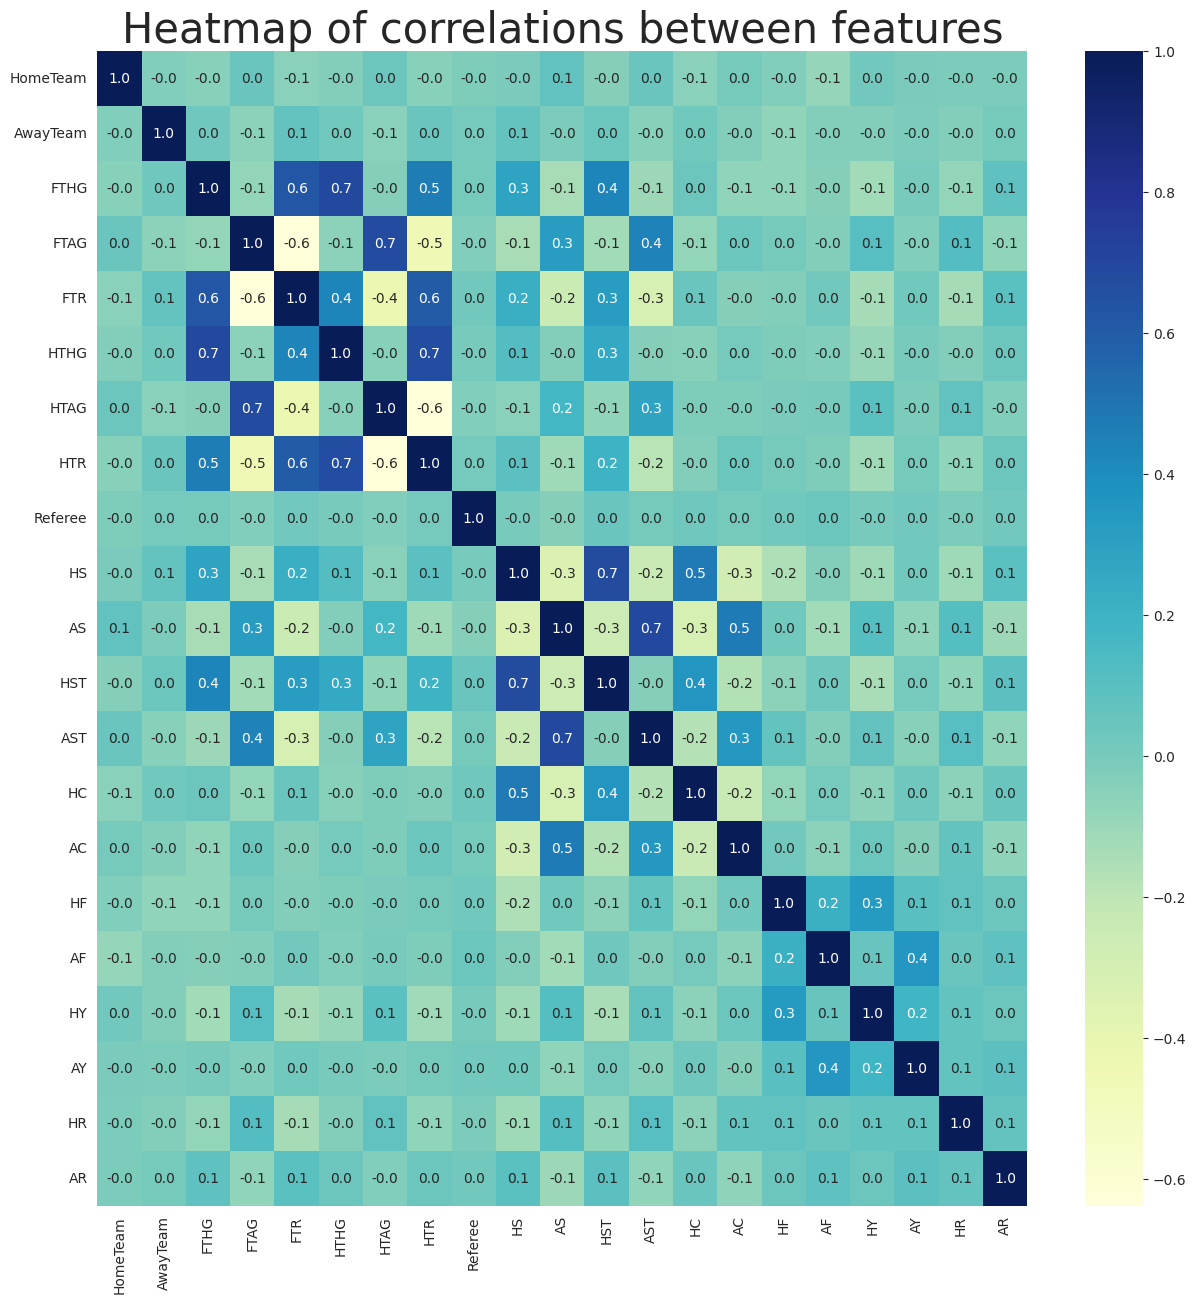

In [168]:
def correlation_heatmap(df: pd.DataFrame, categorical_columns: typing.List[str]):
    #Plotting the heatmap to visualize the strength of correlation between raw data variables
    encoded_df = df.copy()
    encoder = LabelEncoder()
    for col in categorical_columns:
        encoded_df[col] = encoder.fit_transform(encoded_df[col])

    plt.figure(figsize=(15, 15))
    ax = plt.subplot()
    ax.set_title("Heatmap of correlations between features", fontsize=30)
    sns.heatmap(encoded_df.corr(), annot=True, fmt='.1f', cmap="YlGnBu", ax=ax)


correlation_heatmap(df=X, categorical_columns=['HomeTeam', 'AwayTeam', 'Referee', 'FTR', 'HTR'])

There are high correlations between full time and halft time stats (‘HTHG’ and ‘FTHG’ or ‘HTR’ and ‘FTR’). For this reason, in order to avoid overfitting, we did not use ‘HTHG’, ‘HTAG’, ‘HTR’ for feature engineering moving forward. Additionally, we also dropped the ‘Referee’ column since it did not correlate to any other feature which was expected since a referee should be biased during a match.

**Splitting the dataset by season**

---



In [169]:
#Assuming each season runs from August to May*, only exception being season 2019/2020 due to Covid
#Date format is yy-mm-dd

season_dates = [('2000-08-19', '2001-05-31'), ('2001-08-18', '2002-05-11'), ('2002-08-17', '2003-05-11'),
                ('2003-08-16', '2004-05-15'), ('2004-08-14', '2005-05-15'), ('2005-08-13', '2006-05-07'),
                ('2006-08-19', '2007-05-13'), ('2007-08-11', '2008-05-11'), ('2008-08-16', '2009-05-24'),
                ('2009-08-15', '2010-05-09'), ('2010-08-14', '2011-05-22'), ('2011-08-13', '2012-05-13'),
                ('2012-08-18', '2013-05-19'), ('2013-08-17', '2014-05-11'), ('2014-08-16', '2015-05-24'),
                ('2015-08-08', '2016-05-17'), ('2016-08-13', '2017-05-21'), ('2017-08-11', '2018-05-13'),
                ('2018-08-10', '2019-05-12'), ('2019-08-09', '2020-07-26'), ('2020-09-12', '2021-05-23'),
                ('2021-08-13', '2022-05-22'), ('2022-08-05', '2023-05-28')]


def load_season(dates):
    start_date = pd.to_datetime(dates[0])
    end_date = pd.to_datetime(dates[1])
    df = X[(X['Date'] >= start_date) & (X['Date'] <= end_date)]
    return df.reset_index(drop=True)


def get_raw_season_data():
    data = {}
    for i in range(len(season_dates)):
        #Season 0 is 2000-2001, etc.
        data[i] = load_season(season_dates[i])
    return data


raw_season_data = get_raw_season_data()

In [170]:
print(f"Season Indexes: {list(raw_season_data.keys())}")

Season Indexes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


# Methodology Overview

***Feature Engineering***

---



* **Attack and Defensive strengths**




In [171]:
def season_home_goals(season):
    home_goals = int(season['FTHG'].sum())
    nr_matches = len(season)  #380
    return home_goals / nr_matches


def season_away_goals(season):
    away_goals = int(season['FTAG'].sum())
    nr_matches = len(season)  #380
    return away_goals / nr_matches


#Home Attacking Strength (HAS)
def home_attack_strength(season, team):
    nr_matches = len(season[season['HomeTeam'] == team])  #19
    #Goals scored at home
    home_goals = int(season[season['HomeTeam'] == team]['FTHG'].sum())
    avg_goals = home_goals / nr_matches
    #Divide by avg season home goals
    return avg_goals / season_home_goals(season)


#Home Defensive Strength (HDS)
def home_defensive_strength(season, team):
    nr_matches = len(season[season['HomeTeam'] == team])  #19
    #Goals conceded at home
    home_goals_conceded = int(season[season['HomeTeam'] == team]['FTAG'].sum())
    avg_goals = home_goals_conceded / nr_matches
    #Divide by avg season home conceded goals
    return avg_goals / season_away_goals(season)


#Away Attacking Strength (AAS)
def away_attack_strength(season, team):
    nr_matches = len(season[season['AwayTeam'] == team])  #19
    #Goals scored away
    away_goals = int(season[season['AwayTeam'] == team]['FTAG'].sum())
    avg_goals = away_goals / nr_matches
    #Divide by avg season away goals
    return avg_goals / season_away_goals(season)


#Away Defensive Strength (ADS)
def away_defensive_strength(season, team):
    nr_matches = len(season[season['AwayTeam'] == team])  #19
    #Goals conceded away
    away_goals_conceded = int(season[season['AwayTeam'] == team]['FTHG'].sum())
    avg_goals = away_goals_conceded / nr_matches
    #Divide by avg season away conceded goals
    return avg_goals / season_home_goals(season)

* **Conversion rate**

In [172]:
#HomeTeam_CR
def home_team_conversion_rate(match):
    goals = match['HS']
    shots = match['HST']
    if shots == 0:
        return 0
    else:
        return goals / shots


#AwayTeam_CR
def away_team_conversion_rate(match):
    goals = match['AS']
    shots = match['AST']
    if shots == 0:
        return 0
    else:
        return goals / shots


In [173]:
#Mean imputation for missing values
def mean_imputation(df):
    columns = df.columns
    #Mean imputation
    for col in columns:
        df.loc[(df[col].isnull()), col] = df[col].mean()

* **The average no. full time goals, corners, shots, shots on target and fouls in the last 5 matches**

If less than 5 matches have been played, then average the no. of matches played so far

In [174]:
#FTG_5 = avg of full time goals over the last 5 matches
#S_5 = avg of shots over the last 5 matches
#ST_5 = avg of shots on target over the last 5 matches
#F_5 = avg of fouls over the last 5 matches
#C_5 = avg of corners over the last 5 matches

def avg_stats_last_5_matches(team_stats):
    avg_stats_columns = ['FTG_5', 'S_5', 'ST_5', 'F_5', 'C_5']
    stats_list = []
    team_stats_copy = team_stats.copy()
    prefix = 'HomeTeam' if 'HomeTeam' in team_stats_copy.columns else 'AwayTeam'
    #columns = ['FTHG', 'HS', 'HST', 'HF', 'HC'] if prefix == 'HomeTeam' else ['FTAG', 'AS', 'AST', 'AF', 'AC']
    team_stats_copy.columns = [col.replace(prefix, 'Team') for col in team_stats_copy.columns]

    for index, row in team_stats_copy.iterrows():
        stats = team_stats_copy.loc[
            (team_stats_copy['Team'] == row['Team']) & (team_stats_copy['Date'] < row['Date'])].sort_values(by=['Date'],
                                                                                                            ascending=False)
        stats_list.append(stats.iloc[0:5, 2:7].mean(axis=0).values[0:5])

    df = pd.DataFrame(stats_list, columns=[f'{prefix}_{column}' for column in avg_stats_columns])
    mean_imputation(df)

    return df


In [175]:
#HomeTeam Results Last 5 Matches = HomeTeam_R_5
#AwayTeam Results Last 5 Matches = AwayTeam_R_5

def results_last_5_matches(team_stats):
    results = []
    team_stats_copy = team_stats.copy()
    prefix = 'HomeTeam' if 'HomeTeam' in team_stats_copy.columns else 'AwayTeam'
    team_stats_copy.columns = [col.replace(prefix, 'Team') for col in team_stats_copy.columns]

    team_stats_copy['Team_Result'] = team_stats_copy['Team_Result'].replace({'W': 1, 'D': 0, 'L': -1})

    for index, row in team_stats_copy.iterrows():
        last_5_matches = team_stats_copy.loc[(team_stats_copy['Team'] == row['Team']) & (
                team_stats_copy['Date'] < row['Date'])].sort_values(by=['Date'], ascending=False).iloc[0:5, :]
        score = sum(last_5_matches['Team_Result'].tolist())
        results.append(score)

    df = pd.DataFrame()
    df[f'{prefix}_R_5'] = results

    return df

In [176]:
# 3 points are awarded for a win, 1 point for a draw and 0 points for a loss

def season_leaderboard(season) -> typing.Dict[str, int]:
    teams = season['HomeTeam'].unique()
    leaderboard = dict.fromkeys(teams, 0)
    for index, row in season.iterrows():
        if row['FTR'] == 'H':
            leaderboard[row['HomeTeam']] += 3
        elif row['FTR'] == 'D':
            leaderboard[row['HomeTeam']] += 1
            leaderboard[row['AwayTeam']] += 1
        elif row['FTR'] == 'A':
            leaderboard[row['AwayTeam']] += 3
    return leaderboard


* **Team's rankings**


In [177]:
def season_rankings(season, previous_season_scores: typing.Dict[str, int]):
    def add_to_list(ranking_list: typing.List[int], season_column_name: str):
        try:
            ranking_list.append(ranks[row[season_column_name]])
        except KeyError:
            ranking_list.append(len(ranks) + 1)

    home_rankings: list[int] = []
    away_rankings: list[int] = []
    if previous_season_scores is not None:
        ranks: typing.Dict[str, int] = {}
        for rank, team in enumerate(
                [item[0] for item in sorted(previous_season_scores.items(), key=lambda item: item[1], reverse=True)]):
            ranks[team] = rank + 1
        for index, row in season.iterrows():
            add_to_list(ranking_list=home_rankings, season_column_name='HomeTeam')
            add_to_list(ranking_list=away_rankings, season_column_name='AwayTeam')
    return pd.DataFrame(home_rankings, columns=['HomeTeam_Ranking']), pd.DataFrame(away_rankings,
                                                                                   columns=['AwayTeam_Ranking'])

In [178]:
#Splitting the season dataframe into separate dataframes based on whether there are home or away stats
def season_ground_stats(season):
    season.loc[season['FTR'] == 'D', 'HomeTeam_Result'] = 'D'
    season.loc[season['FTR'] == 'H', 'HomeTeam_Result'] = 'W'
    season.loc[season['FTR'] == 'A', 'HomeTeam_Result'] = 'L'

    season.loc[season['FTR'] == 'D', 'AwayTeam_Result'] = 'D'
    season.loc[season['FTR'] == 'H', 'AwayTeam_Result'] = 'L'
    season.loc[season['FTR'] == 'A', 'AwayTeam_Result'] = 'W'

    home_stats = season[['Date', 'HomeTeam', 'FTHG', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR', 'HTHG', 'HomeTeam_Result']]
    away_stats = season[['Date', 'AwayTeam', 'FTAG', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR', 'HTAG', 'AwayTeam_Result']]

    return home_stats, away_stats

In [179]:
#It is assumed that a team's strength over a season is constant

def season_strengths_stats(season):
    strengths_columns = ['HAS', 'AAS', 'HDS', 'ADS']

    home_strengths_lists = []
    away_strengths_lists = []
    for index, row in season.iterrows():
        home_team = row['HomeTeam']
        home_team_has = home_attack_strength(season, home_team)
        home_team_aas = away_attack_strength(season, home_team)
        home_team_hds = home_defensive_strength(season, home_team)
        home_team_ads = away_defensive_strength(season, home_team)
        home_strengths_lists.append([home_team_has, home_team_aas, home_team_hds, home_team_ads])

        away_team = row['AwayTeam']
        away_team_has = home_attack_strength(season, away_team)
        away_team_aas = away_attack_strength(season, away_team)
        away_team_hds = home_defensive_strength(season, away_team)
        away_team_ads = away_defensive_strength(season, away_team)
        away_strengths_lists.append([away_team_has, away_team_aas, away_team_hds, away_team_ads])

    df1 = pd.DataFrame(home_strengths_lists, columns=[f'HomeTeam_{col}' for col in strengths_columns])
    df2 = pd.DataFrame(away_strengths_lists, columns=[f'AwayTeam_{col}' for col in strengths_columns])

    return df1, df2

In [180]:
#Iterate through every match in a season and compute the conversion rate for both teams
def matches_conversion_rates(season):
    home_list = []
    away_list = []

    for index, row in season.iterrows():
        home_list.append(home_team_conversion_rate(row))
        away_list.append(away_team_conversion_rate(row))

    df1 = pd.DataFrame()
    df1['HomeTeam_CR'] = home_list
    df2 = pd.DataFrame()
    df2['AwayTeam_CR'] = away_list

    return df1, df2

* **Goal difference in the last n head-to-head matches between 2 specific teams**


In [181]:
class SquadMatchUps:
    def __init__(self, game_queue_size: int) -> None:
        self.__match_up_results: dict[str, dict[str, queue.Queue]] = {}
        self.__game_queue_size: int = game_queue_size

    def __update_squad(self,
                       squad: str,
                       goals: int,
                       opponent: str,
                       opponent_goals: int) -> None:
        if squad not in self.__match_up_results.keys():
            self.__match_up_results[squad] = {}
        if opponent not in self.__match_up_results[squad].keys():
            self.__match_up_results[squad][opponent] = queue.Queue(maxsize=self.__game_queue_size)
        if self.__match_up_results[squad][opponent].full():
            self.__match_up_results[squad][opponent].get()
        self.__match_up_results[squad][opponent].put(goals - opponent_goals)

    def update(self,
               home_squad: str,
               away_squad: str, home_score: str,
               away_score: str) -> None:
        int_home_score: int = int(home_score)
        int_away_score: int = int(away_score)
        self.__update_squad(squad=home_squad,
                            goals=int_home_score,
                            opponent=away_squad,
                            opponent_goals=int_away_score)
        self.__update_squad(squad=away_squad,
                            goals=int_away_score,
                            opponent=home_squad,
                            opponent_goals=int_home_score)

    def get(self, home_squad: str, away_squad: str) -> typing.Optional[float]:
        try:
            match_up_queue: collections.deque = self.__match_up_results[home_squad][away_squad].queue
            return sum(match_up_queue) / len(match_up_queue)
        except KeyError:
            return None


def get_last_n_match_ups(season, squad_match_ups: SquadMatchUps):
    def add_to_list(heuristic_list: typing.List[typing.Optional[float]],
                    team_a_column_name: str,
                    team_b_column_name: str):
        heuristic_list.append(squad_match_ups.get(home_squad=row[team_a_column_name],
                                                  away_squad=row[team_b_column_name]))

    home_heuristics: list[int] = []
    away_heuristics: list[int] = []
    for _, row in season.iterrows():
        add_to_list(heuristic_list=home_heuristics,
                    team_a_column_name='HomeTeam',
                    team_b_column_name='AwayTeam')
        add_to_list(heuristic_list=away_heuristics,
                    team_a_column_name='AwayTeam',
                    team_b_column_name='HomeTeam')
        squad_match_ups.update(home_squad=row['HomeTeam'],
                               away_squad=row['AwayTeam'],
                               home_score=row['FTHG'],
                               away_score=row['FTAG'])

    df1, df2 = pd.DataFrame(home_heuristics, columns=['HomeTeam_NMatchUps']), pd.DataFrame(away_heuristics, columns=[
        'AwayTeam_NMatchUps'])
    mean_imputation(df1)
    mean_imputation(df2)

    return df1, df2

In [182]:
#Adding the new features to each season

def season_stats(season, previous_season_scores, squad_match_ups):
    home_stats, away_stats = season_ground_stats(season)

    home_strengths, away_strengths = season_strengths_stats(season)

    home_conversion_rate, away_conversion_rate = matches_conversion_rates(season)

    home_rankings, away_rankings = season_rankings(season=season, previous_season_scores=previous_season_scores)

    home_match_ups, away_match_ups = get_last_n_match_ups(season=season, squad_match_ups=squad_match_ups)

    home_stats_last_5 = avg_stats_last_5_matches(home_stats)
    away_stats_last_5 = avg_stats_last_5_matches(away_stats)

    home_results_last_5 = results_last_5_matches(home_stats)
    away_results_last_5 = results_last_5_matches(away_stats)

    home_stats['HomeTeam_Result'] = home_stats['HomeTeam_Result'].replace({1: 'W', 0: 'D', -1: 'L'})
    away_stats['AwayTeam_Result'] = away_stats['AwayTeam_Result'].replace({1: 'W', 0: 'D', -1: 'L'})

    df1 = pd.concat(
        [home_stats, home_strengths, home_stats_last_5, home_results_last_5, home_conversion_rate, home_rankings,
         home_match_ups], axis=1)
    away_stats.drop(['Date'], axis=1, inplace=True)  #avoid duplication
    df2 = pd.concat(
        [away_stats, away_strengths, away_stats_last_5, away_results_last_5, away_conversion_rate, away_rankings,
         away_match_ups], axis=1)

    season_stats = pd.concat([df1, df2.reset_index(drop=True)], axis=1, ignore_index=False)

    return season_stats

In [183]:
#Process all seasons 
all_seasons = []
previous_season_scores: typing.Optional[typing.Tuple[str, int]] = None
squad_match_ups: SquadMatchUps = SquadMatchUps(game_queue_size=5)
for i in raw_season_data.keys():
    all_seasons.append(season_stats(raw_season_data.get(i), previous_season_scores, squad_match_ups))
    previous_season_scores = season_leaderboard(raw_season_data.get(i))

all_matches_stats = pd.concat(all_seasons, axis=0, ignore_index=True)

In [184]:
#Added X['Referee'], X['FTR'], X['HTR'] for completeness

all_matches_stats['FTR'] = X['FTR']
all_matches_stats['HTR'] = X['HTR']
all_matches_stats['Referee'] = X['Referee']

In [185]:
all_matches_stats.to_csv('all_features.csv')

# Model Training & Validation

Reading the csv file with the raw and engineered features

In [186]:
filepath = r'all_features.csv'
data = pd.read_csv(filepath)
data.drop('Unnamed: 0', axis=1, inplace=True)

Dropping the first season as not enough preceding data to produce engineered features

In [187]:
data = data.iloc[380:].reset_index(drop=True)
targets = data[['FTR']]

Selecting the features for the design matrix used for training

In [188]:
non_numerical_cols = ['HomeTeam', 'AwayTeam']
features_names = ['HAS', 'AAS', 'HDS', 'ADS', 'FTG_5', 'S_5', 'ST_5', 'F_5', 'C_5', 'Ranking', 'NMatchUps']
numerical_cols = [f'HomeTeam_{name}' for name in features_names] + [f'AwayTeam_{name}' for name in features_names]
features = data[non_numerical_cols + numerical_cols]

Encode the non-numerical features

In [189]:
labelEncoder_features = LabelEncoder()
labelEncoder_features.fit(features['HomeTeam'].unique())

features.HomeTeam = labelEncoder_features.transform(features.HomeTeam)
features.AwayTeam = labelEncoder_features.transform(features.AwayTeam)

In [190]:
labelEncoder_targets = LabelEncoder()
targets = labelEncoder_targets.fit_transform(targets)

Scale the numerical features

In [191]:
standardScaler = StandardScaler()
features[numerical_cols] = standardScaler.fit_transform(features[numerical_cols])

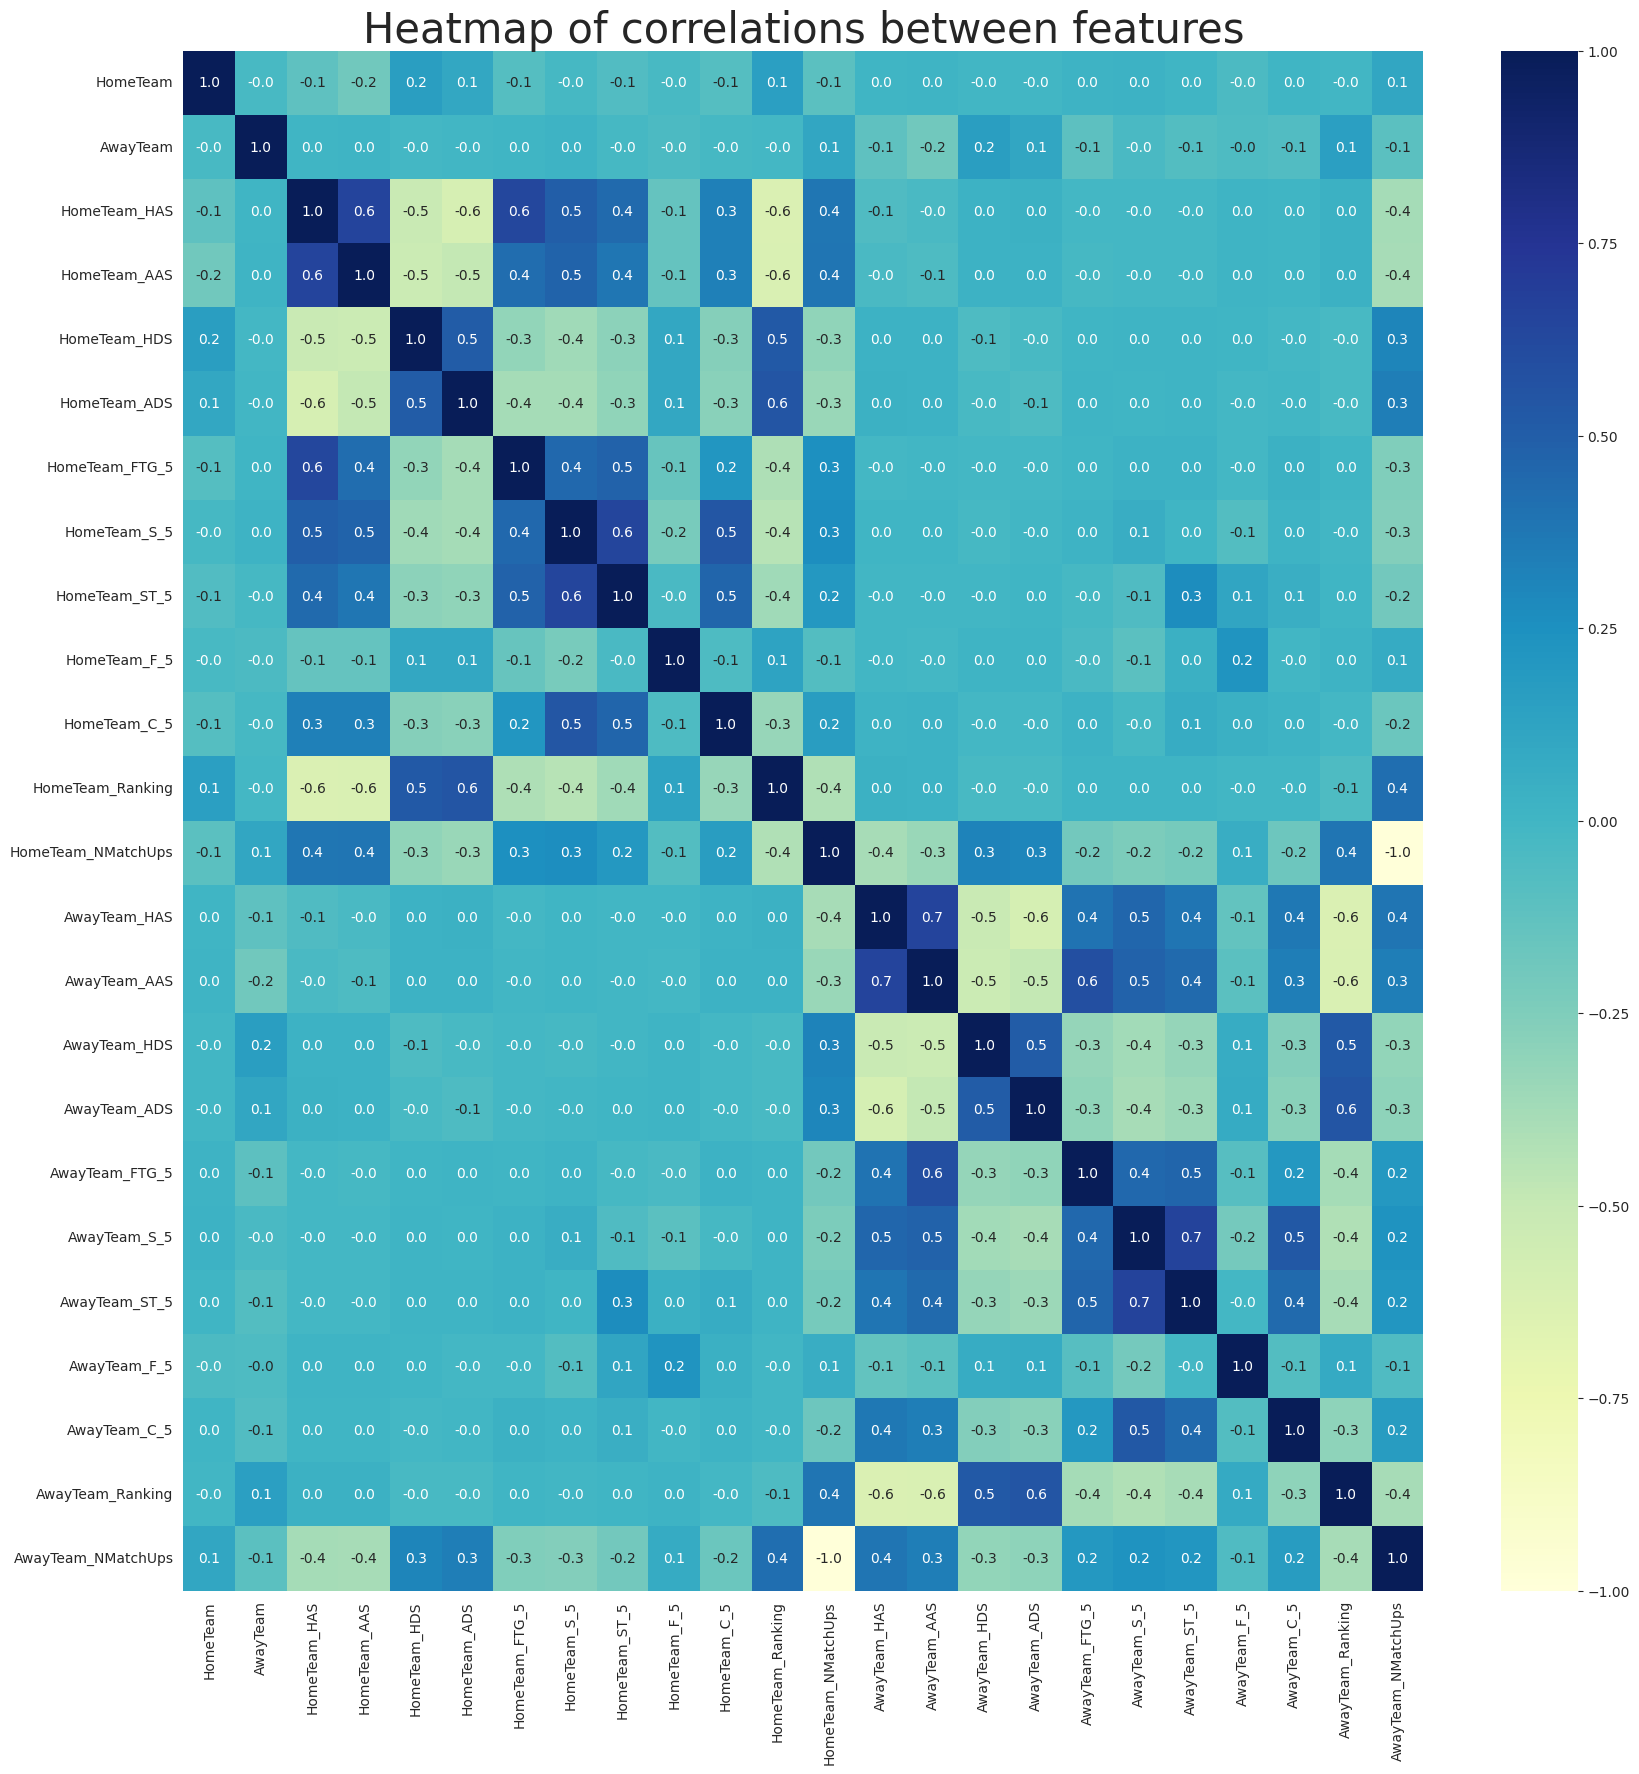

In [192]:
def plot_engineered_correlations():
    plt.figure(figsize=(20, 20))
    ax = plt.subplot()
    ax.set_title("Heatmap of correlations between features", fontsize=30)
    sns.heatmap(features.corr(), annot=True, fmt='.1f', cmap="YlGnBu", ax=ax)


plot_engineered_correlations()

The dataset is split into 80% training and 20% validation.

In [193]:
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

**Models**

---

The models we selected are the following:
1. Random Forest
2. SVM
3. Decision Tree
4. Gaussian Naive Bayes
5. Gradient Boosting
6. k Neighbours
7. Ridge Classifier



In [194]:
base_classifiers = [(SVC(), {'kernel': ['rbf'],
                             'gamma': ['scale', 'auto'],
                             'decision_function_shape': ['ovo', 'ovr'],
                             'probability': [True]}),
                    (RandomForestClassifier(), {'criterion': ['gini', 'entropy', 'log_loss'],
                                                'max_features': ['sqrt', 'log2', None],
                                                'class_weight': ['balanced”', 'balanced_subsample']}),
                    (DecisionTreeClassifier(), {'criterion': ['gini', 'entropy', 'log_loss'],
                                                'splitter': ['best', 'random'],
                                                'max_features': ['sqrt', 'log2', None]}),
                    (GaussianNB(), {}),
                    (GradientBoostingClassifier(), {'criterion': ['friedman_mse', 'squared_error'],
                                                    'max_features': ['sqrt', 'log2', None]}),
                    (KNeighborsClassifier(), {'weights': ['uniform', 'distance'],
                                              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}),
                    (RidgeClassifierCV(), {})]
clf_names = ['Kernel SVM', 'Random Forest', 'DecisionTreeClassifier', 'Gaussian Naive Bayes', 'Gradient Boosting',
             'K Neighbours', 'Ridge Classifier']
models = []
models_pca = []

**Hyperparameters tuning**

In [195]:
classifiers = []
for classifier in base_classifiers:
    t = time.time()
    classifiers.append(RandomizedSearchCV(estimator=classifier[0],
                                          param_distributions=classifier[1],
                                          verbose=4,
                                          cv=3,
                                          n_jobs=-1,
                                          random_state=1))

**Training**

In [196]:
print('Models training times')
model_preds = []

for clf_name, clf in zip(clf_names, classifiers):
    t = time.time()
    clf.fit(X_train, Y_train)
    model_preds.append(clf.predict(X_test))
    models.append(clf)
    print(f'{clf_name} took {round((time.time() - t), 4)} seconds')


Models training times
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Kernel SVM took 26.421 seconds
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest took 8.0022 seconds
Fitting 3 folds for each of 10 candidates, totalling 30 fits
DecisionTreeClassifier took 0.4029 seconds
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Gaussian Naive Bayes took 0.139 seconds
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Gradient Boosting took 8.7416 seconds
Fitting 3 folds for each of 8 candidates, totalling 24 fits
K Neighbours took 0.7347 seconds
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Ridge Classifier took 0.2136 seconds


**Evaluation measures**

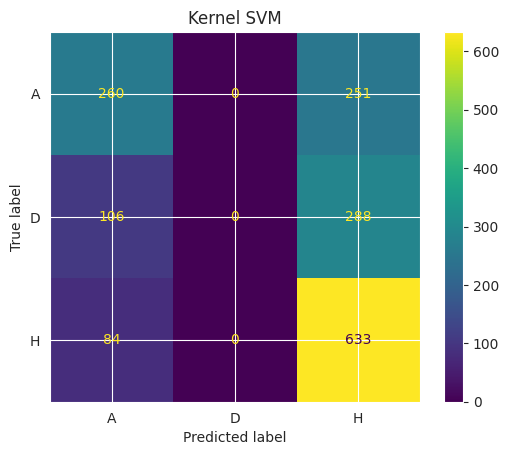

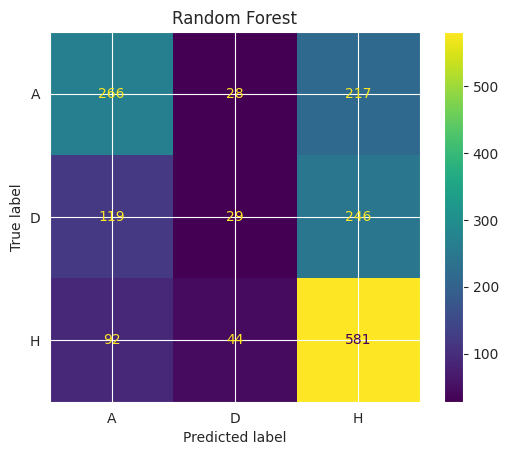

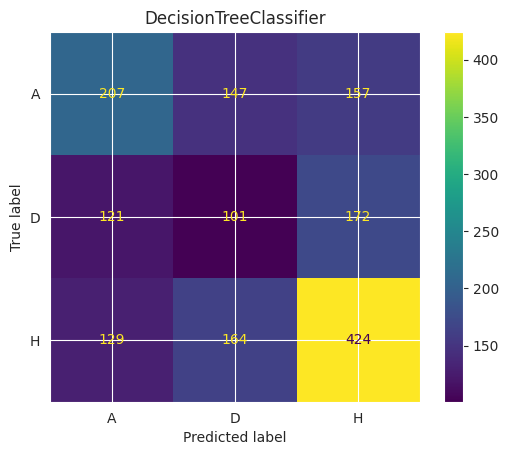

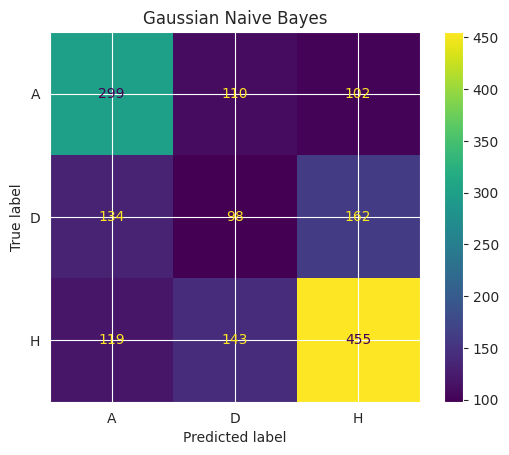

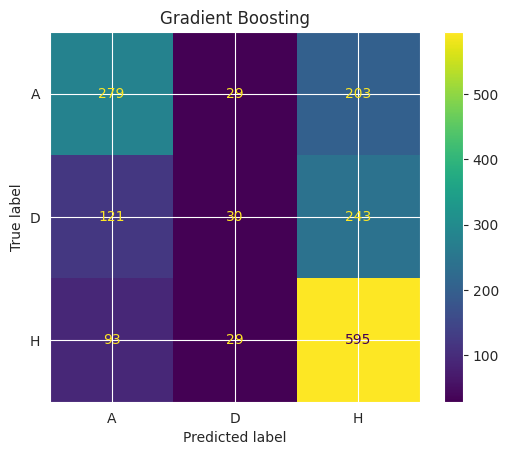

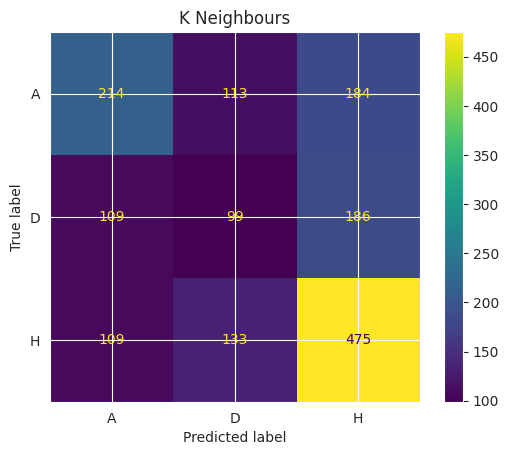

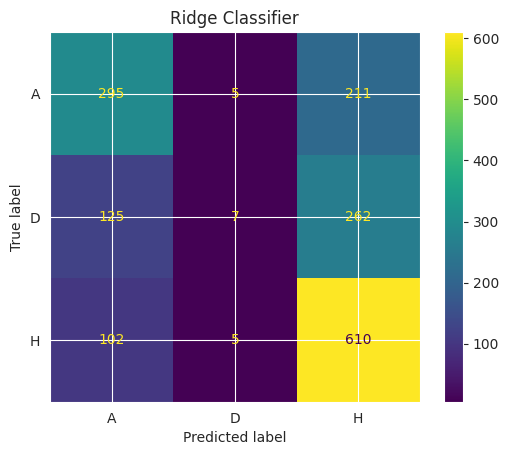

In [197]:
eval_measures = pd.DataFrame()
for clf_name, y_pred in zip(clf_names, model_preds):
    accuracy = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred, average="macro")
    recall = recall_score(Y_test, y_pred, average="macro")
    precision = precision_score(Y_test, y_pred, average="macro")
    eval_measures = eval_measures.append(pd.DataFrame([[clf_name, accuracy, f1, recall, precision]],
                                                      columns=['Model', 'Accuracy', 'F1 score', 'Recall', 'Precision']),
                                         ignore_index=True)
    ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred),
                           display_labels=labelEncoder_targets.inverse_transform(clf.classes_)).plot()
    plt.title(clf_name)
    plt.show()


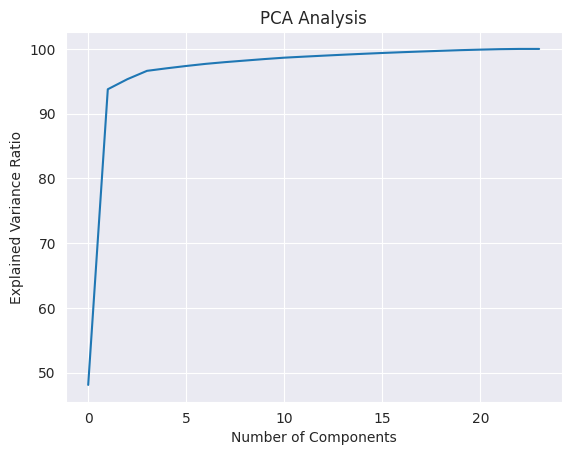

In [198]:
def pca_transform(data, n_components):
    
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(data)
    return pca, transformed_data

pca, _ = pca_transform(features, None)
pca_components = np.cumsum(pca.explained_variance_ratio_*100)
plt.figure()
plt.plot(pca_components)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Analysis')
plt.show()

#New pca with less components
pca, pca_data = pca_transform(features, 5)

In [199]:
pca_X_train, pca_X_test, Y_train, Y_test = train_test_split(pca_data, targets, test_size=0.2, random_state=42)

**Hyperparameters tuning after PCA**

In [200]:
pca_classifiers = []
for classifier in base_classifiers:
    t = time.time()
    pca_classifiers.append(RandomizedSearchCV(estimator=classifier[0],
                                              param_distributions=classifier[1],
                                              verbose=4,
                                              cv=3,
                                              n_jobs=-1,
                                              random_state=1))

**Training after PCA**

In [201]:
print('Models training times after PCA')
model_preds_pca = []

for clf_name, clf in zip(clf_names, pca_classifiers):
    t = time.time()
    clf.fit(pca_X_train, Y_train)
    model_preds_pca.append(clf.predict(pca_X_test))
    models_pca.append(clf)
    print(f'{clf_name} took {round((time.time() - t), 4)} seconds')

Models training times after PCA
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Kernel SVM took 18.6811 seconds
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest took 5.3629 seconds
Fitting 3 folds for each of 10 candidates, totalling 30 fits
DecisionTreeClassifier took 0.1336 seconds
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Gaussian Naive Bayes took 0.0132 seconds
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Gradient Boosting took 8.978 seconds
Fitting 3 folds for each of 8 candidates, totalling 24 fits
K Neighbours took 0.2763 seconds
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Ridge Classifier took 0.0163 seconds


**Evaluation metrics after PCA**

In [202]:
eval_measures_pca = pd.DataFrame()
for clf_name, y_pred in zip(clf_names, model_preds_pca):
    accuracy = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred, average="macro")
    recall = recall_score(Y_test, y_pred, average="macro")
    precision = precision_score(Y_test, y_pred, average="macro")
    eval_measures_pca = eval_measures_pca.append(pd.DataFrame([[clf_name, accuracy, f1, recall, precision]],
                                                 columns=['Model', 'Accuracy', 'F1 score', 'Recall', 'Precision']),
                                                 ignore_index=True)


**Neural Network Attempt**

Epoch 1/500
82/82 [==============================] - 1s 3ms/step - loss: 1.3261 - accuracy: 0.4397 - val_loss: 1.0896 - val_accuracy: 0.5025
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0498 - accuracy: 0.5287 - val_loss: 1.0379 - val_accuracy: 0.5382
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0218 - accuracy: 0.5378 - val_loss: 1.0320 - val_accuracy: 0.5395
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0011 - accuracy: 0.5429 - val_loss: 1.0100 - val_accuracy: 0.5543
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 0.9884 - accuracy: 0.5481 - val_loss: 1.0126 - val_accuracy: 0.5419
Epoch 6/500
82/82 [==============================] - 0s 1ms/step - loss: 0.9772 - accuracy: 0.5561 - val_loss: 0.9969 - val_accuracy: 0.5623
Epoch 7/500
82/82 [==============================] - 0s 1ms/step - loss: 0.9730 - accuracy: 0.5578 - val_loss: 1.0006 - val_accuracy: 0.5395
Epoch 8/500
8

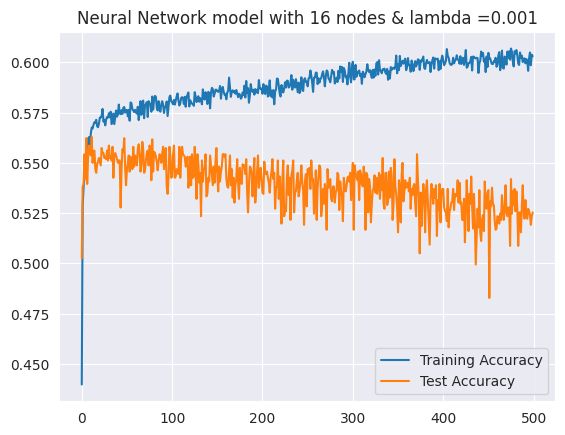

51/51 [==============================] - 0s 860us/step
Epoch 1/500
82/82 [==============================] - 1s 3ms/step - loss: 1.2167 - accuracy: 0.4579 - val_loss: 1.0808 - val_accuracy: 0.5148
Epoch 2/500
82/82 [==============================] - 0s 1ms/step - loss: 1.0515 - accuracy: 0.5319 - val_loss: 1.0553 - val_accuracy: 0.5265
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0292 - accuracy: 0.5318 - val_loss: 1.0394 - val_accuracy: 0.5444
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0220 - accuracy: 0.5367 - val_loss: 1.0157 - val_accuracy: 0.5530
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 0.9992 - accuracy: 0.5501 - val_loss: 1.0081 - val_accuracy: 0.5493
Epoch 6/500
82/82 [==============================] - 0s 1ms/step - loss: 0.9892 - accuracy: 0.5571 - val_loss: 1.0002 - val_accuracy: 0.5573
Epoch 7/500
82/82 [==============================] - 0s 1ms/step - loss: 0.9814 - accuracy: 0.5561 

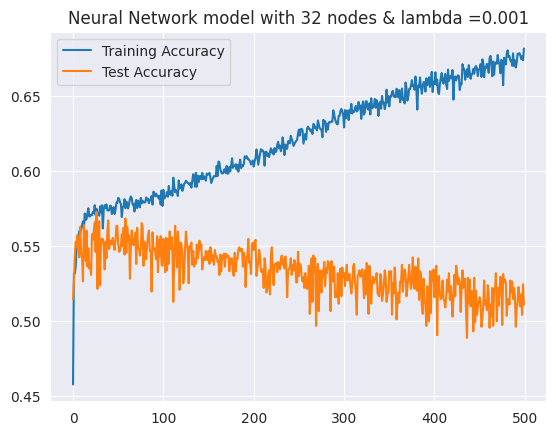

51/51 [==============================] - 0s 915us/step
Epoch 1/500
82/82 [==============================] - 1s 4ms/step - loss: 1.1622 - accuracy: 0.4926 - val_loss: 1.0901 - val_accuracy: 0.5376
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0706 - accuracy: 0.5353 - val_loss: 1.0727 - val_accuracy: 0.5296
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0363 - accuracy: 0.5413 - val_loss: 1.0826 - val_accuracy: 0.5080
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0285 - accuracy: 0.5443 - val_loss: 1.0574 - val_accuracy: 0.5518
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0111 - accuracy: 0.5555 - val_loss: 1.0437 - val_accuracy: 0.5401
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 0.9952 - accuracy: 0.5548 - val_loss: 1.0282 - val_accuracy: 0.5493
Epoch 7/500
82/82 [==============================] - 0s 2ms/step - loss: 0.9948 - accuracy: 0.5598 

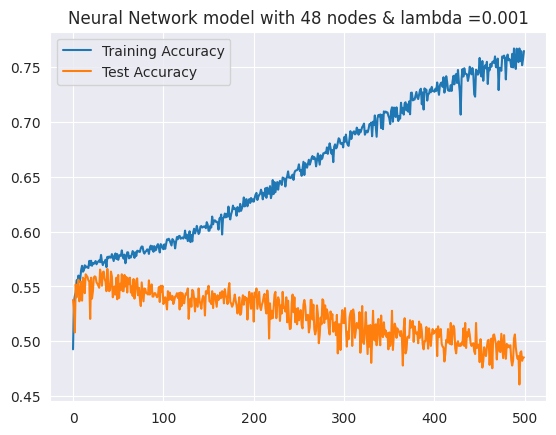

51/51 [==============================] - 0s 833us/step
Epoch 1/500
82/82 [==============================] - 1s 3ms/step - loss: 1.7566 - accuracy: 0.3154 - val_loss: 1.3465 - val_accuracy: 0.4248
Epoch 2/500
82/82 [==============================] - 0s 1ms/step - loss: 1.2569 - accuracy: 0.4736 - val_loss: 1.1899 - val_accuracy: 0.4982
Epoch 3/500
82/82 [==============================] - 0s 1ms/step - loss: 1.1410 - accuracy: 0.5224 - val_loss: 1.1095 - val_accuracy: 0.5314
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0788 - accuracy: 0.5393 - val_loss: 1.0926 - val_accuracy: 0.5284
Epoch 5/500
82/82 [==============================] - 0s 1ms/step - loss: 1.0521 - accuracy: 0.5424 - val_loss: 1.0551 - val_accuracy: 0.5370
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0294 - accuracy: 0.5558 - val_loss: 1.0306 - val_accuracy: 0.5493
Epoch 7/500
82/82 [==============================] - 0s 1ms/step - loss: 1.0209 - accuracy: 0.5568 

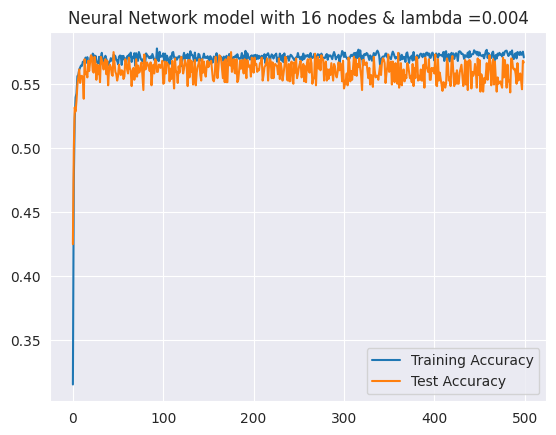

51/51 [==============================] - 0s 901us/step
Epoch 1/500
82/82 [==============================] - 1s 3ms/step - loss: 1.8912 - accuracy: 0.4184 - val_loss: 1.2718 - val_accuracy: 0.5333
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 1.2048 - accuracy: 0.5427 - val_loss: 1.1673 - val_accuracy: 0.5573
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1352 - accuracy: 0.5531 - val_loss: 1.1254 - val_accuracy: 0.5530
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1015 - accuracy: 0.5571 - val_loss: 1.0980 - val_accuracy: 0.5536
Epoch 5/500
82/82 [==============================] - 0s 1ms/step - loss: 1.0784 - accuracy: 0.5566 - val_loss: 1.0863 - val_accuracy: 0.5555
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0620 - accuracy: 0.5626 - val_loss: 1.0821 - val_accuracy: 0.5469
Epoch 7/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0513 - accuracy: 0.5585 

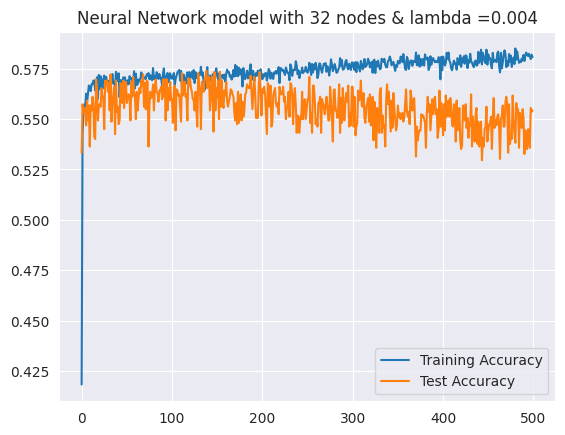

51/51 [==============================] - 0s 775us/step
Epoch 1/500
82/82 [==============================] - 1s 3ms/step - loss: 1.5204 - accuracy: 0.4971 - val_loss: 1.3821 - val_accuracy: 0.5259
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 1.2931 - accuracy: 0.5435 - val_loss: 1.2603 - val_accuracy: 0.5407
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 1.2169 - accuracy: 0.5566 - val_loss: 1.2468 - val_accuracy: 0.5302
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1724 - accuracy: 0.5566 - val_loss: 1.1603 - val_accuracy: 0.5549
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1413 - accuracy: 0.5620 - val_loss: 1.1432 - val_accuracy: 0.5506
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1189 - accuracy: 0.5648 - val_loss: 1.1427 - val_accuracy: 0.5462
Epoch 7/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0973 - accuracy: 0.5646 

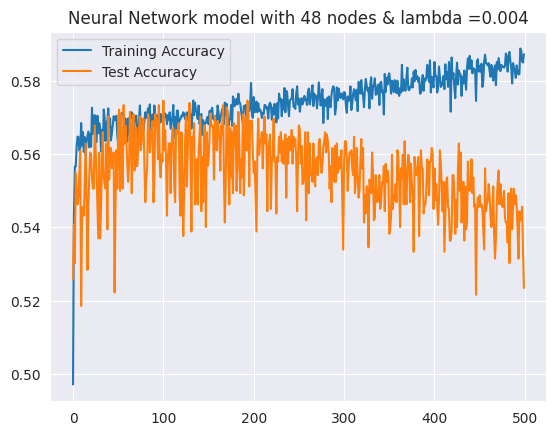

51/51 [==============================] - 0s 802us/step
Epoch 1/500
82/82 [==============================] - 1s 3ms/step - loss: 1.7831 - accuracy: 0.4653 - val_loss: 1.3671 - val_accuracy: 0.4464
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 1.2635 - accuracy: 0.5074 - val_loss: 1.2038 - val_accuracy: 0.5191
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1618 - accuracy: 0.5379 - val_loss: 1.1491 - val_accuracy: 0.5370
Epoch 4/500
82/82 [==============================] - 0s 1ms/step - loss: 1.1112 - accuracy: 0.5520 - val_loss: 1.1142 - val_accuracy: 0.5413
Epoch 5/500
82/82 [==============================] - 0s 1ms/step - loss: 1.0856 - accuracy: 0.5500 - val_loss: 1.0801 - val_accuracy: 0.5561
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0610 - accuracy: 0.5595 - val_loss: 1.0686 - val_accuracy: 0.5469
Epoch 7/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0463 - accuracy: 0.5618 

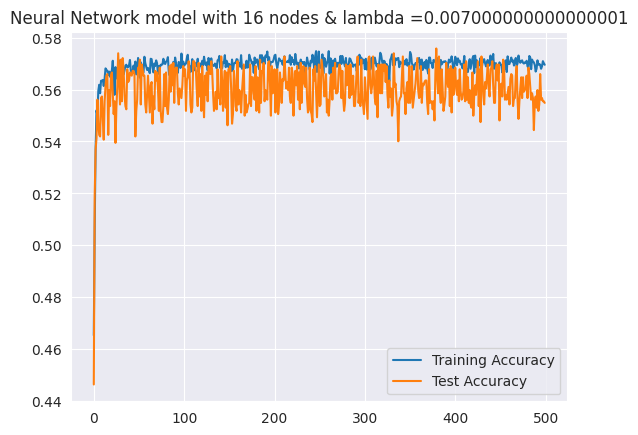

51/51 [==============================] - 0s 760us/step
Epoch 1/500
82/82 [==============================] - 1s 3ms/step - loss: 1.6852 - accuracy: 0.4832 - val_loss: 1.4283 - val_accuracy: 0.5395
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 1.3593 - accuracy: 0.5378 - val_loss: 1.2919 - val_accuracy: 0.5543
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 1.2606 - accuracy: 0.5515 - val_loss: 1.2464 - val_accuracy: 0.5462
Epoch 4/500
82/82 [==============================] - 0s 1ms/step - loss: 1.2170 - accuracy: 0.5432 - val_loss: 1.1936 - val_accuracy: 0.5499
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1620 - accuracy: 0.5594 - val_loss: 1.2115 - val_accuracy: 0.5259
Epoch 6/500
82/82 [==============================] - 0s 1ms/step - loss: 1.1352 - accuracy: 0.5629 - val_loss: 1.1545 - val_accuracy: 0.5475
Epoch 7/500
82/82 [==============================] - 0s 1ms/step - loss: 1.1154 - accuracy: 0.5620 

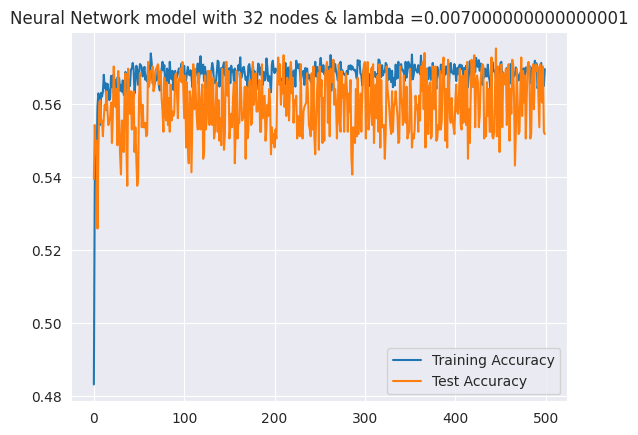

51/51 [==============================] - 0s 772us/step
Epoch 1/500
82/82 [==============================] - 1s 3ms/step - loss: 1.8081 - accuracy: 0.4843 - val_loss: 1.5824 - val_accuracy: 0.5382
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 1.4590 - accuracy: 0.5432 - val_loss: 1.4677 - val_accuracy: 0.5068
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 1.3172 - accuracy: 0.5470 - val_loss: 1.2700 - val_accuracy: 0.5561
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 1.2333 - accuracy: 0.5524 - val_loss: 1.2218 - val_accuracy: 0.5481
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1887 - accuracy: 0.5577 - val_loss: 1.2078 - val_accuracy: 0.5228
Epoch 6/500
82/82 [==============================] - 0s 1ms/step - loss: 1.1543 - accuracy: 0.5600 - val_loss: 1.1527 - val_accuracy: 0.5524
Epoch 7/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1245 - accuracy: 0.5632 

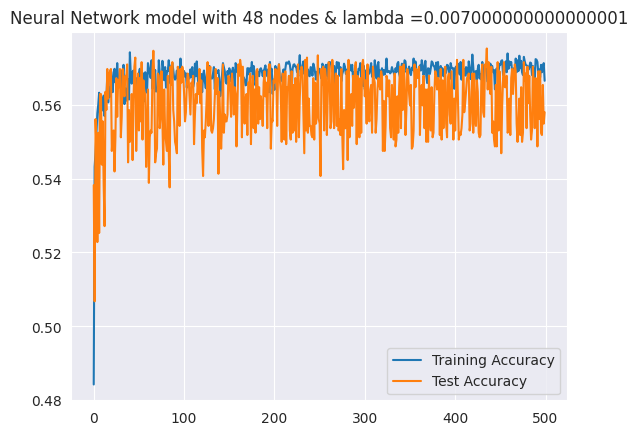

51/51 [==============================] - 0s 775us/step
Epoch 1/500
82/82 [==============================] - 1s 3ms/step - loss: 2.9604 - accuracy: 0.2762 - val_loss: 1.5426 - val_accuracy: 0.4852
Epoch 2/500
82/82 [==============================] - 0s 1ms/step - loss: 1.4104 - accuracy: 0.5085 - val_loss: 1.3361 - val_accuracy: 0.5197
Epoch 3/500
82/82 [==============================] - 0s 1ms/step - loss: 1.2847 - accuracy: 0.5312 - val_loss: 1.2419 - val_accuracy: 0.5388
Epoch 4/500
82/82 [==============================] - 0s 1ms/step - loss: 1.2122 - accuracy: 0.5386 - val_loss: 1.1848 - val_accuracy: 0.5444
Epoch 5/500
82/82 [==============================] - 0s 1ms/step - loss: 1.1625 - accuracy: 0.5469 - val_loss: 1.1484 - val_accuracy: 0.5506
Epoch 6/500
82/82 [==============================] - 0s 1ms/step - loss: 1.1292 - accuracy: 0.5548 - val_loss: 1.1198 - val_accuracy: 0.5561
Epoch 7/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1058 - accuracy: 0.5600 

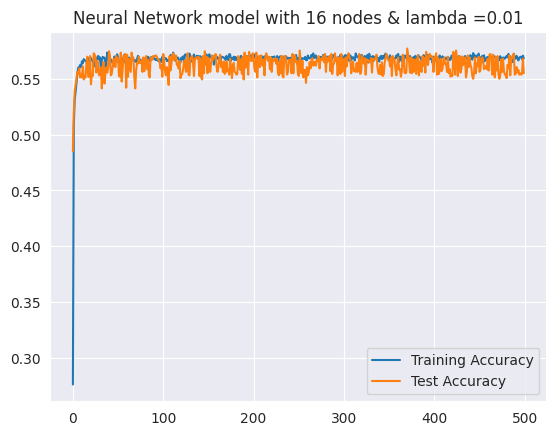

51/51 [==============================] - 0s 951us/step
Epoch 1/500
82/82 [==============================] - 1s 4ms/step - loss: 1.7311 - accuracy: 0.5151 - val_loss: 1.5232 - val_accuracy: 0.5407
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 1.4187 - accuracy: 0.5389 - val_loss: 1.3186 - val_accuracy: 0.5549
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 1.2540 - accuracy: 0.5497 - val_loss: 1.2067 - val_accuracy: 0.5555
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1722 - accuracy: 0.5555 - val_loss: 1.1931 - val_accuracy: 0.5321
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1266 - accuracy: 0.5529 - val_loss: 1.1113 - val_accuracy: 0.5647
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1022 - accuracy: 0.5535 - val_loss: 1.0904 - val_accuracy: 0.5555
Epoch 7/500
82/82 [==============================] - 0s 2ms/step - loss: 1.0724 - accuracy: 0.5585 

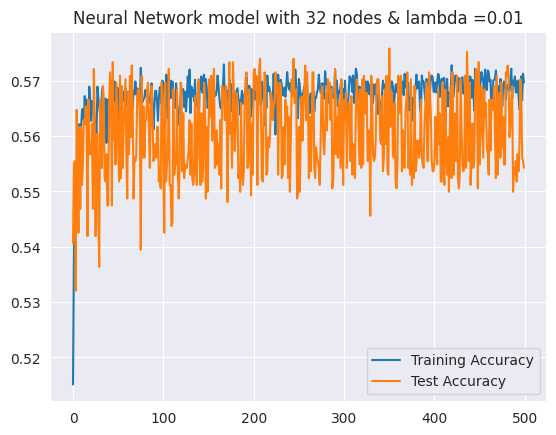

51/51 [==============================] - 0s 954us/step
Epoch 1/500
82/82 [==============================] - 2s 4ms/step - loss: 2.0148 - accuracy: 0.5210 - val_loss: 1.7436 - val_accuracy: 0.5407
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 1.5929 - accuracy: 0.5483 - val_loss: 1.4656 - val_accuracy: 0.5555
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 1.4096 - accuracy: 0.5427 - val_loss: 1.4148 - val_accuracy: 0.5191
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 1.2958 - accuracy: 0.5561 - val_loss: 1.2704 - val_accuracy: 0.5512
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 1.2326 - accuracy: 0.5601 - val_loss: 1.2103 - val_accuracy: 0.5660
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1927 - accuracy: 0.5601 - val_loss: 1.1853 - val_accuracy: 0.5641
Epoch 7/500
82/82 [==============================] - 0s 2ms/step - loss: 1.1624 - accuracy: 0.5605 

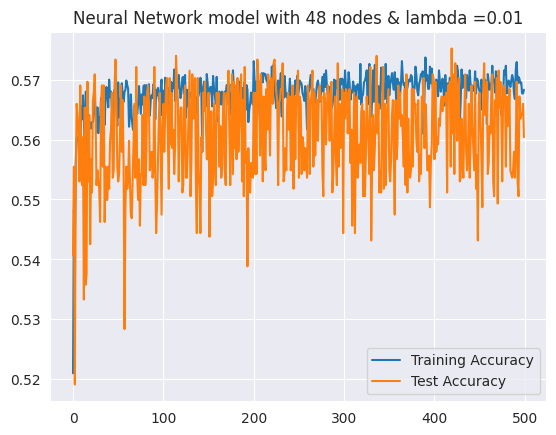

51/51 [==============================] - 0s 877us/step


In [203]:
#Here we define our NN model
def model_creator(nodes, lambda_, train_data):
    model = Sequential()

    model.add(Dense(nodes, activation='relu', input_shape=(train_data.shape[1],),
                    kernel_regularizer=tf.keras.regularizers.l2(lambda_)))
    model.add(Dense(nodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)))
    model.add(Dense(nodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

    return model

def HyperParameterTuning(X_train, X_test, Y_train, Y_test):
    lambda_parameters = np.linspace(0.001, 0.01, 4)
    nodes = 16*np.arange(1, 4)
    models_accuracies = []
    for lambda_ in lambda_parameters:
        for node in nodes:
            model = model_creator(node, lambda_, X_train)
            r = model.fit(x=X_train, y=Y_train, validation_data=(X_test, Y_test), batch_size=80, epochs=500)
            plt.figure()
            plt.plot(r.history['accuracy'])
            plt.plot(r.history['val_accuracy'])
            plt.title(f'Neural Network model with {node} nodes & lambda ={lambda_}')
            plt.legend(['Training Accuracy','Test Accuracy'])
            plt.show()

            #Accuracy testing on test
            pred = model.predict(X_test)
            pred = [np.argmax(x) for x in pred]
            correct_answers = 0
            for y, y_hat in zip(pred, Y_test):
                if y == y_hat:
                    correct_answers += 1
            models_accuracies.append((model, f'Neural Network model with {node} nodes & lambda ={lambda_}', correct_answers / len(pred)))

    return models_accuracies

neural_networks = HyperParameterTuning(X_train, X_test, Y_train, Y_test)

# Results

In [204]:
#Results obtained on the training dataset
display(eval_measures)

,Model,Accuracy,F1 score,Recall,Precision
0,Kernel SVM,0.550555,0.403766,0.463884,0.372627
1,Random Forest,0.540074,0.438495,0.468158,0.467098
2,DecisionTreeClassifier,0.451295,0.418392,0.417595,0.420394
3,Gaussian Naive Bayes,0.525277,0.486450,0.489482,0.484564
4,Gradient Boosting,0.557337,0.452388,0.483992,0.492799
5,K Neighbours,0.485820,0.443332,0.444179,0.448152
6,Ridge Classifier,0.562269,0.427664,0.481944,0.513383


In [205]:
#Results obtained on the training dataset after PCA
display(eval_measures_pca)

,Model,Accuracy,F1 score,Recall,Precision
0,Kernel SVM,0.514797,0.369222,0.427924,0.346006
1,Random Forest,0.509248,0.434150,0.448069,0.448392
2,DecisionTreeClassifier,0.417386,0.389844,0.389615,0.390867
3,Gaussian Naive Bayes,0.538224,0.399918,0.456660,0.407137
4,Gradient Boosting,0.532059,0.414575,0.454729,0.456585
5,K Neighbours,0.467324,0.428108,0.429064,0.429169
6,Ridge Classifier,0.543773,0.400270,0.461019,0.361767


In [206]:
#Results obtained on the training dataset with the Neural Network
for model, parameters, accuracy in neural_networks:
    print(parameters, accuracy)


Neural Network model with 16 nodes & lambda =0.001 0.5252774352651048
Neural Network model with 32 nodes & lambda =0.001 0.5110974106041923
Neural Network model with 48 nodes & lambda =0.001 0.48520345252774355
Neural Network model with 16 nodes & lambda =0.004 0.5665844636251541
Neural Network model with 32 nodes & lambda =0.004 0.5542540073982737
Neural Network model with 48 nodes & lambda =0.004 0.5234278668310728
Neural Network model with 16 nodes & lambda =0.007000000000000001 0.5548705302096177
Neural Network model with 32 nodes & lambda =0.007000000000000001 0.5517879161528977
Neural Network model with 48 nodes & lambda =0.007000000000000001 0.5579531442663379
Neural Network model with 16 nodes & lambda =0.01 0.5548705302096177
Neural Network model with 32 nodes & lambda =0.01 0.5542540073982737
Neural Network model with 48 nodes & lambda =0.01 0.5604192355117139


In [207]:
accuracies = [model_accuracy[2] for model_accuracy in neural_networks]
best_model_index = (accuracies.index(max(accuracies)))
print(f'Best NN Model Accuracy: {accuracies[best_model_index]}')
best_model_parameters = neural_networks[best_model_index][1]
print(best_model_parameters)


Best NN Model Accuracy: 0.5665844636251541
Neural Network model with 16 nodes & lambda =0.004


In [208]:
#Re running the Neural Network on the training dataset after PCA

best_model = model_creator(48, 0.01, pca_X_train)
r = best_model.fit(x=pca_X_train, y=Y_train, validation_data=(pca_X_test, Y_test), batch_size=80, epochs=500)
pred = best_model.predict(pca_X_test)
pred = [np.argmax(x) for x in pred]
correct_answers = 0
for y, y_hat in zip(pred, Y_test):
    if y == y_hat:
        correct_answers += 1
accuracy = correct_answers / len(pred)
print(f'Model accuracy of the best model trained on PCA data:' + str({accuracy}))

Epoch 1/500
82/82 [==============================] - 1s 3ms/step - loss: 2.1028 - accuracy: 0.4634 - val_loss: 1.7997 - val_accuracy: 0.5074
Epoch 2/500
82/82 [==============================] - 0s 2ms/step - loss: 1.6822 - accuracy: 0.5254 - val_loss: 1.5941 - val_accuracy: 0.5216
Epoch 3/500
82/82 [==============================] - 0s 2ms/step - loss: 1.5266 - accuracy: 0.5287 - val_loss: 1.4849 - val_accuracy: 0.5271
Epoch 4/500
82/82 [==============================] - 0s 2ms/step - loss: 1.4230 - accuracy: 0.5358 - val_loss: 1.3969 - val_accuracy: 0.5185
Epoch 5/500
82/82 [==============================] - 0s 2ms/step - loss: 1.3571 - accuracy: 0.5301 - val_loss: 1.3319 - val_accuracy: 0.5290
Epoch 6/500
82/82 [==============================] - 0s 2ms/step - loss: 1.2980 - accuracy: 0.5361 - val_loss: 1.2831 - val_accuracy: 0.5290
Epoch 7/500
82/82 [==============================] - 0s 2ms/step - loss: 1.2517 - accuracy: 0.5347 - val_loss: 1.2363 - val_accuracy: 0.5395
Epoch 8/500
8

# Final Predictions on Test Set

In [209]:
predict_data = pd.read_csv('epl-test.csv')


In [210]:
predict_data

,Date,HomeTeam,AwayTeam
0,14/01/2023,Aston Villa,Leeds
1,14/01/2023,Brentford,Bournemouth
2,14/01/2023,Brighton,Liverpool
3,14/01/2023,Chelsea,Crystal Palace
4,14/01/2023,Everton,Southampton
5,14/01/2023,Man United,Man City
6,14/01/2023,Newcastle,Fulham
7,14/01/2023,Nott'm Forest,Leicester
8,14/01/2023,Tottenham,Arsenal
9,14/01/2023,Wolves,West Ham


In [211]:
preds_df = pd.DataFrame(columns=non_numerical_cols + numerical_cols)


def replace_feature(temp_x: pd.DataFrame, column: str) -> None:
    for home_away in ['HomeTeam', 'AwayTeam']:
        temp_x.at[idx, f'{home_away}_{column}'] = data[data[home_away] == row[home_away]][f'{home_away}_{column}'].tail(
            1)


def replace_feature_last_n(temp_x: pd.DataFrame, column: typing.Tuple[str, str],
                           column_features: str, n: int) -> None:
    for column_index, home_away in enumerate(['HomeTeam', 'AwayTeam']):
        last_5 = data[data[home_away] == row[home_away]][f'{column[column_index]}'].tail(5)
        temp_x.at[idx, f'{home_away}_{column_features}_{n}'] = sum(last_5) / len(last_5)


for _, row in predict_data.iterrows():
    temp_x = data.append(row)
    temp_x = temp_x.reset_index(drop=True)
    idx = len(temp_x) - 1
    for feature in ['HAS', 'AAS', 'HDS', 'ADS', 'Ranking']:
        replace_feature(temp_x=temp_x, column=feature)
    for feature in [(('FTHG', 'FTAG'), 'FTG'), (('HS', 'AS'), 'S'), (('HST', 'AST'), 'ST'), (('HF', 'AF'), 'F'),
                    (('HC', 'AC'), 'C')]:
        replace_feature_last_n(temp_x=temp_x, column=feature[0], column_features=feature[1], n=5)
    temp_x.at[idx, f'HomeTeam_NMatchUps'] = squad_match_ups.get(home_squad=row['HomeTeam'], away_squad=row['AwayTeam'])
    temp_x.at[idx, f'AwayTeam_NMatchUps'] = squad_match_ups.get(home_squad=row['AwayTeam'], away_squad=row['HomeTeam'])

    preds_df = preds_df.append(temp_x.tail(1)[non_numerical_cols + numerical_cols], ignore_index=True)

In [212]:
preds_df

,HomeTeam,AwayTeam,HomeTeam_HAS,HomeTeam_AAS,HomeTeam_HDS,HomeTeam_ADS,HomeTeam_FTG_5,HomeTeam_S_5,HomeTeam_ST_5,HomeTeam_F_5,...,AwayTeam_AAS,AwayTeam_HDS,AwayTeam_ADS,AwayTeam_FTG_5,AwayTeam_S_5,AwayTeam_ST_5,AwayTeam_F_5,AwayTeam_C_5,AwayTeam_Ranking,AwayTeam_NMatchUps
0,Aston Villa,Leeds,0.753363,0.415385,0.807692,1.210762,1.2,12.0,5.0,11.2,...,1.130769,0.969231,1.224215,1.0,13.0,4.0,12.0,5.2,17.0,-0.2
1,Brentford,Bournemouth,1.049327,0.969231,0.969231,1.412556,1.6,9.2,4.2,9.4,...,0.969231,1.107692,1.883408,1.2,7.6,3.4,9.6,2.8,21.0,0.0
2,Brighton,Liverpool,0.941704,1.453846,0.646154,1.035874,2.0,17.6,7.0,10.2,...,0.969231,0.969231,0.904036,1.0,14.8,5.4,9.2,7.0,2.0,0.2
3,Chelsea,Crystal Palace,1.130045,0.969231,0.969231,0.807175,2.0,11.4,3.6,8.2,...,0.581538,1.107692,0.904036,0.6,9.0,3.4,11.0,2.8,12.0,-2.4
4,Everton,Southampton,0.565022,0.692308,0.646154,0.645740,1.2,12.0,4.2,8.8,...,0.553846,1.292308,0.968610,0.2,9.4,1.8,12.0,3.4,15.0,0.0
5,Man United,Man City,0.847534,1.292308,0.646154,1.130045,1.6,16.2,5.0,11.2,...,1.615385,0.969231,0.470852,1.6,16.2,6.4,7.8,6.4,1.0,1.2
6,Newcastle,Fulham,1.291480,1.292308,0.692308,0.470852,2.2,19.0,6.0,12.6,...,1.453846,1.523077,1.035874,1.8,10.8,4.0,8.6,4.6,21.0,-1.8
7,Nott'm Forest,Leicester,0.659193,0.138462,1.453846,1.533632,1.2,11.0,3.4,12.4,...,1.938462,0.830769,1.789238,2.0,11.2,5.0,10.6,3.4,8.0,4.0
8,Tottenham,Arsenal,1.506726,1.384615,0.969231,0.807175,2.4,17.6,7.4,10.4,...,1.776923,1.130769,0.376682,1.8,12.8,4.6,9.6,3.8,5.0,0.0
9,Wolves,West Ham,0.282511,0.415385,1.292308,0.887892,0.6,10.6,2.8,10.8,...,0.415385,0.969231,0.565022,0.4,13.2,3.8,8.6,8.8,7.0,1.4


In [213]:
preds_df.HomeTeam = labelEncoder_features.transform(preds_df.HomeTeam)
preds_df.AwayTeam = labelEncoder_features.transform(preds_df.AwayTeam)

In [214]:
predictions = [model.predict(preds_df) for model in models]
predict_data.join(pd.DataFrame(
    [[labelEncoder_targets.classes_[prediction[game_index]] for prediction in predictions] for game_index in
     range(len(predictions[0]))],
    columns=clf_names))

,Date,HomeTeam,AwayTeam,Kernel SVM,Random Forest,DecisionTreeClassifier,Gaussian Naive Bayes,Gradient Boosting,K Neighbours,Ridge Classifier
0,14/01/2023,Aston Villa,Leeds,H,H,D,H,D,H,H
1,14/01/2023,Brentford,Bournemouth,H,H,D,H,D,D,H
2,14/01/2023,Brighton,Liverpool,A,H,D,H,D,A,H
3,14/01/2023,Chelsea,Crystal Palace,H,H,D,H,D,D,H
4,14/01/2023,Everton,Southampton,H,H,D,H,D,H,H
5,14/01/2023,Man United,Man City,A,H,D,H,D,A,A
6,14/01/2023,Newcastle,Fulham,H,H,D,H,D,H,H
7,14/01/2023,Nott'm Forest,Leicester,A,A,D,H,D,H,H
8,14/01/2023,Tottenham,Arsenal,H,H,D,H,D,H,A
9,14/01/2023,Wolves,West Ham,A,H,D,A,D,A,A


Selecting and writing best model predictions

In [215]:
accuracies: typing.List[float] = [model.score(X_test, Y_test) for model in models]
max_accuracy_index: int = accuracies.index(max(accuracies))
print(f'Highest Accuracy Model: {clf_names[max_accuracy_index]} with accuracy {accuracies[max_accuracy_index]}')
a = predict_data.join(
    pd.DataFrame([labelEncoder_targets.classes_[prediction] for prediction in predictions[max_accuracy_index]],
                 columns=['FTR']))
a.to_csv('./sample-submission.csv', index=False)
a

Highest Accuracy Model: Ridge Classifier with accuracy 0.562268803945746


,Date,HomeTeam,AwayTeam,FTR
0,14/01/2023,Aston Villa,Leeds,H
1,14/01/2023,Brentford,Bournemouth,H
2,14/01/2023,Brighton,Liverpool,H
3,14/01/2023,Chelsea,Crystal Palace,H
4,14/01/2023,Everton,Southampton,H
5,14/01/2023,Man United,Man City,A
6,14/01/2023,Newcastle,Fulham,H
7,14/01/2023,Nott'm Forest,Leicester,H
8,14/01/2023,Tottenham,Arsenal,A
9,14/01/2023,Wolves,West Ham,A
